## Unsupervised Learning: Clustering a Customers Dataset With Kmeans

#### 1. Import Libraries

In [1]:
# Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

%matplotlib inline

#### 2. Import Dataset

In [2]:
#Get dataset from Azure (or can store in on local machine)
#data is from http://archive.ics.uci.edu/ml/datasets/Wholesale+customers

# azureml-core of version 1.0.72 or higher is required
# azureml-dataprep[pandas] of version 1.1.34 or higher is required
from azureml.core import Workspace, Dataset

subscription_id = '6ca51967-a345-496d-b5bd-bd009dda9e9d'
resource_group = 'MyRes1'
workspace_name = 'Mick1'

workspace = Workspace(subscription_id, resource_group, workspace_name)

dataset = Dataset.get_by_name(workspace, name='Wholesale customer dataset')

In [ ]:
#convert to pandas dataframe
cust_df = dataset.to_pandas_dataframe()

In [3]:
#looking at the dataframe
cust_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


#### 3. Data Preprocessing

In [4]:
#normalise the dataset
from sklearn.preprocessing import normalize

In [5]:
cust_norm = normalize(cust_df)

In [6]:
#back to pandas df
norm_df = pd.DataFrame(cust_norm)

In [7]:
#reduce the dimensions of the dataset
from sklearn.decomposition import PCA 

In [8]:
pca = PCA(3)

In [9]:
pca.fit(norm_df)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [10]:
#back to pandas df
pca_data = pd.DataFrame(pca.transform(norm_df))

In [11]:
#new dataframe...
pca_data.head()

,0,1,2
0,0.034037,-0.180421,0.229754
1,0.351057,-0.046644,0.180286
2,0.305375,0.055551,0.221512
3,-0.383677,0.161789,-0.137268
4,-0.318591,-0.076970,0.031286


#### 4. Import, instantiate and fit model

In [12]:
#import, create instance and fit model
from sklearn.cluster import KMeans

In [13]:
#trying different numbers of centroids

print('kmeans.inertia values:')
x = []
y = []
for clusters in range(1,20):
    kmeans = KMeans(n_clusters = clusters)
    kmeans.fit(pca_data)
    x = x + [clusters]
    y = y + [kmeans.inertia_]
    print('Clusters=' + str(clusters)+ ': ' + str(kmeans.inertia_))
  

kmeans.inertia values:
Clusters=1: 123.53905394056228
Clusters=2: 48.09752480120369
Clusters=3: 35.94383096471082
Clusters=4: 27.27347947860281
Clusters=5: 21.653182115996504
Clusters=6: 18.164362918944093
Clusters=7: 15.903756255463247
Clusters=8: 13.970653786196387
Clusters=9: 12.785835536142894
Clusters=10: 11.95746579594105
Clusters=11: 11.080860135544793
Clusters=12: 10.495690854619664
Clusters=13: 9.749351863784668
Clusters=14: 9.240688773255258
Clusters=15: 8.843063085745115
Clusters=16: 8.40840958519832
Clusters=17: 7.932678167991738
Clusters=18: 7.484347949073859
Clusters=19: 7.232189459143432


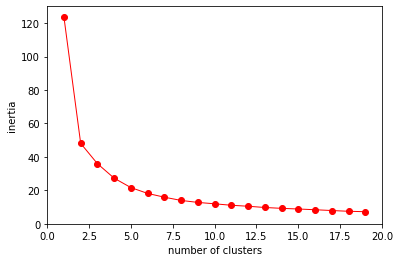

In [14]:
plt.plot(x, y, 'ro', linestyle = '-', linewidth=1)
plt.axis([0, 20, 0, 130])
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.show()

##### From the graph we can see that the point of diminishing returns comes at around k=5

In [15]:
clusters = 5
kmeans = KMeans(n_clusters = clusters)

In [16]:
kmeans.fit(pca_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [17]:
print(kmeans.labels_)

[0 4 4 2 2 0 0 0 0 1 1 2 0 0 0 2 1 4 0 0 2 3 2 4 0 0 2 2 1 2 0 4 2 2 4 1 2
 0 1 2 2 2 1 1 0 4 1 4 0 1 3 1 2 1 2 0 1 1 2 0 0 1 0 1 3 1 1 0 4 2 3 0 3 2
 0 2 3 1 2 4 2 1 0 2 0 1 4 2 3 2 2 3 1 3 4 1 1 3 3 2 0 1 1 2 2 2 1 1 4 1 2
 1 2 2 2 2 2 0 2 2 2 0 2 0 2 2 2 0 4 2 3 2 2 2 2 2 4 4 0 0 2 2 2 3 2 1 2 2
 3 2 2 4 2 4 2 1 1 2 1 1 1 2 2 1 4 0 1 4 2 2 1 4 1 1 1 1 2 0 0 4 0 2 1 4 1
 0 3 1 1 1 2 2 2 1 2 2 3 1 0 2 1 1 0 1 1 1 2 1 1 1 2 1 2 1 1 1 1 2 1 2 2 1
 3 3 2 2 0 3 0 3 3 4 2 4 2 4 2 2 2 2 2 2 2 0 1 1 2 2 2 3 0 1 3 0 4 2 0 3 2
 2 0 3 2 1 1 4 1 2 1 2 3 4 4 2 4 4 2 3 2 0 0 0 2 2 2 2 2 2 2 2 0 0 3 1 2 0
 2 0 1 1 0 1 1 1 1 4 1 2 2 4 3 2 1 2 0 4 2 1 2 4 4 0 2 0 2 3 3 1 2 3 2 1 2
 1 3 0 2 3 3 3 1 1 1 1 3 1 1 0 0 1 0 1 4 1 2 1 2 1 4 4 2 2 0 0 0 1 2 2 2 2
 2 2 4 0 2 2 1 2 0 1 2 2 2 3 4 2 4 2 2 2 3 4 4 2 2 2 4 2 2 2 3 2 2 2 2 2 2
 1 0 0 0 4 1 3 3 0 1 1 1 0 1 0 2 2 0 3 0 2 4 2 1 3 2 4 0 0 2 1 2 0]


#### 5. Model Evaluation

In [18]:
kmeans.inertia_

21.64814391487556

In [19]:
from sklearn.metrics import silhouette_score
score = silhouette_score(pca_data, kmeans.labels_)
score

0.42577944865505735

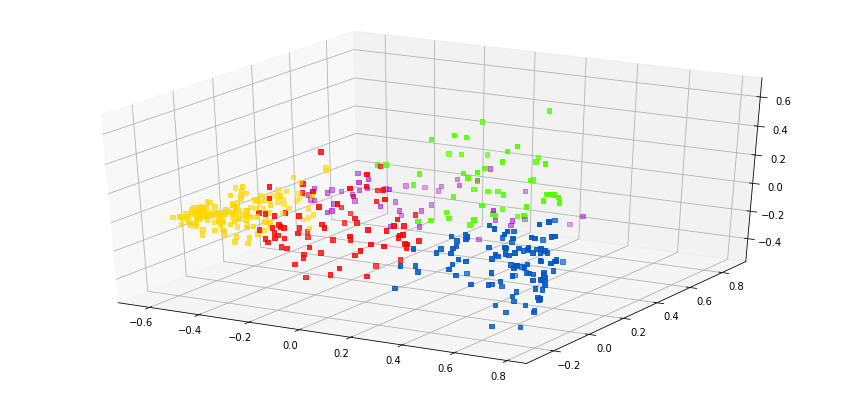

In [20]:
fig = plt.figure()
fig.set_figheight(7)
fig.set_figwidth(15)
ax = fig.add_subplot(111, projection='3d')
x = pca_data[0]
y = pca_data[1]
z = pca_data[2]
ax.scatter(x,y,z, marker="s", c=kmeans.labels_, s=20, cmap = 'prism')

#### 6. Re-examine Dataset

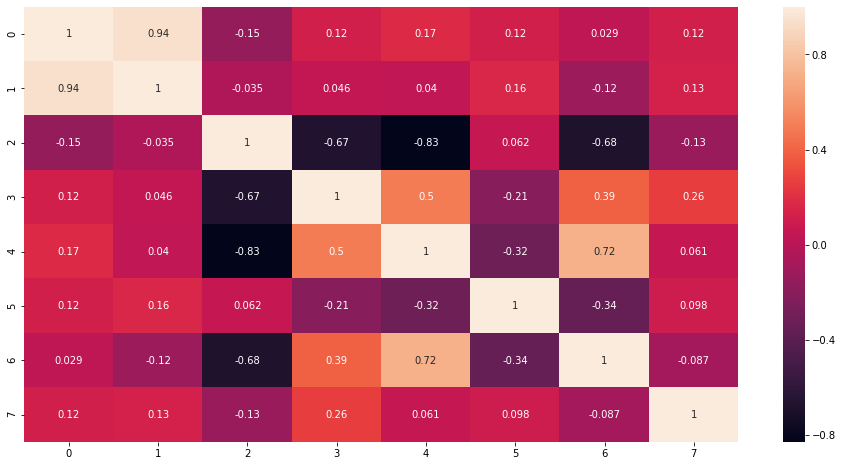

In [21]:
import seaborn as sns 
  
# generating correlation heatmap 
plt.figure(figsize = (16,8))
sns.heatmap(norm_df.corr(), annot = True) 
  
# posting correlation heatmap to output console  
plt.show() 